In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import itertools
from collections import Counter
import nltk
from nltk.stem.snowball import SnowballStemmer

import string
from nltk import wordpunct_tokenize

from wordcloud import WordCloud
from datetime import datetime
import pickle
import re

#progress bar
from tqdm import tqdm, tqdm_notebook

# instantiate
tqdm.pandas(tqdm_notebook)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Scommentare se si usano i dati iniziali

In [ ]:
'''dataReviewsChunk = pd.read_json('../data/reviews.json', lines=True, chunksize=10000)'''

In [ ]:
'''dataReviews'''

In [ ]:
'''
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in dataReviewsChunk:

    chunk_list.append(chunk)
'''

In [ ]:
#dataReviews = pd.concat(chunk_list)

In [ ]:
## elimino recensioni non verificate e quelli con helpfull == 0

In [ ]:
'''def convert_to_int(field):
    return field["$numberInt"]'''

In [ ]:
'''dataReviews["rating"]=dataReviews["rating"].apply(convert_to_int).astype(int)'''

In [ ]:
'''dataReviews["helpful"]=dataReviews["helpful"].apply(convert_to_int).astype(int)'''

In [ ]:
'''dataReviews = dataReviews.loc[dataReviews["verified"] == True]'''

In [ ]:
'''len(dataReviews.loc[dataReviews["verified"] == False])'''

In [ ]:
'''len(dataReviews.loc[dataReviews["helpful"] == 0]) - len(dataReviews.loc[dataReviews["helpful"] != 0])'''

In [ ]:
'''dataReviews = dataReviews.loc[dataReviews["helpful"] != 0]
dataReviews'''

### Dati filtrati (vedi sopra)

In [ ]:
dataReviews = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [ ]:
dataReviews

In [ ]:
counts = dataReviews["rating"].value_counts()

In [ ]:
counts.values

In [ ]:
x = counts._index
print(x)
y = counts.values
print(y)

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [ ]:
print("Proportion of review with score=1: {}%".format(len(dataReviews[dataReviews.rating == 1]) / len(dataReviews)*100))
print("Proportion of review with score=2: {}%".format(len(dataReviews[dataReviews.rating == 2]) / len(dataReviews)*100))
print("Proportion of review with score=3: {}%".format(len(dataReviews[dataReviews.rating == 3]) / len(dataReviews)*100))
print("Proportion of review with score=4: {}%".format(len(dataReviews[dataReviews.rating == 4]) / len(dataReviews)*100))
print("Proportion of review with score=5: {}%".format(len(dataReviews[dataReviews.rating == 5]) / len(dataReviews)*100))

In [ ]:
# recensioni vuote
dataReviews[dataReviews["body"].str.len() == 0]

In [ ]:
dataReviews.loc[dataReviews['rating'] == 3 , 'polarity'] = 'neutral'
dataReviews.loc[dataReviews['rating'] > 3 , 'polarity'] = 'positive'
dataReviews.loc[dataReviews['rating'] < 3 , 'polarity'] = 'negative'

In [ ]:
counts = dataReviews["polarity"].value_counts()
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [ ]:
def undersampling(df):
    positive, negative, _ = df.polarity.value_counts()
    df_positive = df[df.polarity == 'positive']
    df_positive = df_positive.sample(negative, random_state=1)
    df_negative = df[df.polarity == 'negative']
    df = pd.concat([df_positive, df_negative])
    #df = df.sample(frac=1)
    return df

In [ ]:
new_dataReviews = undersampling(dataReviews)

In [ ]:
counts = new_dataReviews["polarity"].value_counts()
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

### Funzioni varie

In [ ]:
def flat_list(l):
    return  [item for sublist in l for item in sublist]

In [ ]:
def plot_common_tokens(tokens, title, n=20):
    sentences = (list(itertools.chain(tokens)))
    flat_sentences = flat_list(sentences)
    counts = Counter(flat_sentences)
    #print(counts.most_common(30))
    common_words = [word[0] for word in counts.most_common(n)]
    common_counts = [word[1] for word in counts.most_common(n)]
    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=common_words, y=common_counts)
    plt.title(title)
    plt.show()

In [ ]:
def word_Cloud(sentences):
    flat_sentences = flat_list(sentences)
    unique_string=(" ").join(flat_sentences)

    wordcloud = WordCloud(background_color="white").generate(unique_string)
    plt.figure(figsize = (10, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Tokenizzazione

In [ ]:
new_dataReviews['token']=new_dataReviews['body'].progress_apply(word_tokenize)

In [ ]:
#new_dataReviews['token'] #Name: token, Length: 130648, dtype: object

### Stopwords

In [17]:
stop_words=nltk.corpus.stopwords.words('italian')
stop_words

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["token"].progress_apply(lambda sentence : [word for word in sentence if word.lower() not in stop_words])

### Punctuation

In [19]:
punctuation = string.punctuation
punctuation = punctuation + "..."+ "''" + "``" + "--"+ ".."
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~...''``--..


In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [word for word in sentence if word not in punctuation])

### Numbers

In [ ]:
regex_numbers = r'(?:(?:\d+,?)+(?:\.?\d+)?)'

In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [re.sub(regex_numbers,"",word) for word in sentence if re.sub(regex_numbers,"",word) != ""])

### Eliminazione token di lunghezza 1

In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [word for word in sentence if len(word)> 1])

In [ ]:
new_dataReviews.to_csv("dati_puliti.csv")

In [ ]:
plot_common_tokens(new_dataReviews['cleaned'],'Most Common Tokens used in Reviews')

In [ ]:
word_Cloud(new_dataReviews["cleaned"])

In [ ]:
sentences = (list(itertools.chain(new_dataReviews["cleaned"])))
flat_sentences = flat_list(sentences)
counts = Counter(flat_sentences)
counts.most_common()

### Stemming

In [21]:
stemmer = SnowballStemmer("italian")
def stemming_token(sentence,stemmer):
    stem = []
    for elem in sentence:
        stem.append(stemmer.stem(elem))
    return stem

In [ ]:
new_dataReviews["stemming"]=[stemming_token(row["cleaned"], stemmer) for _, row in tqdm(new_dataReviews.iterrows())]

In [ ]:
#new_dataReviews = pd.read_csv("../data/dati_finali.csv", sep=",", index_col=0)

In [ ]:
### da fare solo se si legge il csv finale

In [ ]:
#def str_to_list(sentence):
#   return ast.literal_eval(sentence)

In [ ]:
#import ast

#new_dataReviews["stemming"] = new_dataReviews["stemming"].progress_apply(str_to_list)

In [ ]:
len(new_dataReviews)

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
count_vect = CountVectorizer(stop_words=None, lowercase=True)
#lowercase = true -> Convert all characters to lowercase before tokenizing.
#stop_words = None -> If None, no stop words will be used
bow = count_vect.fit(new_dataReviews['stemming'].apply(lambda x: " ".join(x)))

In [ ]:
import pickle
with open('../model/bow.bin', 'wb') as f:
    pickle.dump(bow, f, pickle.HIGHEST_PROTOCOL)
#s = pickle.dumps(model)

In [13]:
with open('../model/bow.bin', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    bow = pickle.load(f)

c:\users\christian\universita\magistrale\ianno\dataanalytics\progetto\dataanalyticsproject\src\venv_da\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
count_vect

In [ ]:
bow.get_feature_names()[::2000]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(bow, new_dataReviews['polarity'], test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(new_dataReviews['stemming'].apply(lambda x: " ".join(x)), new_dataReviews['polarity'], test_size=0.2, random_state=1)    

In [ ]:
print("train size: ",len(X_train))
print("test size:",len(X_test))

In [ ]:
print("y train distribution:\n",y_train.value_counts())
print("y train distribution:\n",y_test.value_counts())

In [ ]:
model = LogisticRegression()
model.fit(bow.transform(X_train), y_train)

In [ ]:
predictions = model.predict(bow.transform(X_test))

In [ ]:
predictions

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predictions)

In [ ]:
confusion_matrix(y_test, predictions)

In [15]:
def clean_sentence(sentence):
    tokens = word_tokenize(sentence)
    tokens_clean = []
    for word in tokens:
        if word.lower() not in stop_words and word.lower() not in punctuation and not word.isnumeric() and len(word)> 1:
            
            tokens_clean.append(stemmer.stem(word))
    return ' '.join(tokens_clean)

In [ ]:
sentence="belle le scarpe e le stringhe per il colore , però sono comode"

In [ ]:
clean_sentence(sentence)

In [ ]:
print(bow.transform([clean_sentence(sentence)]))

In [ ]:
model.predict(bow.transform([clean_sentence(sentence)]))

In [ ]:

with open('../model/model.bin', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
#s = pickle.dumps(model)

In [3]:
with open('../model/model.bin', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    model = pickle.load(f)

c:\users\christian\universita\magistrale\ianno\dataanalytics\progetto\dataanalyticsproject\src\venv_da\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\christian\universita\magistrale\ianno\dataanalytics\progetto\dataanalyticsproject\src\venv_da\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
model.predict(bow.transform([clean_sentence(sentence)]))

### Sentimenti recensioni neutre

In [ ]:
dataReviews_neutre = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [ ]:
dataReviews_neutre = dataReviews_neutre.loc[dataReviews_neutre["rating"]==3]

In [ ]:
dataReviews_neutre

In [ ]:
dataReviews_neutre["polarity"] = dataReviews_neutre["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)])))

In [ ]:
dataReviews_neutre["polarity"]

In [ ]:
print("Proportion of review with score=3 that is positive: {}%".format(len(dataReviews_neutre[dataReviews_neutre.polarity == "positive"]) / len(dataReviews_neutre)*100))
print("Proportion of review with score=3 that is negative: {}%".format(len(dataReviews_neutre[dataReviews_neutre.polarity == "negative"]) / len(dataReviews_neutre)*100))

In [ ]:
dataReviews_neutre["polarity"].value_counts().plot(kind="bar")


### Prodotti nel tempo

In [57]:
dataReviews = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [69]:
# look for good examples
dataReviews.groupby('product').count().sort_values('_id', ascending=False).head(10)

,_id,title,author-id,author-name,date,rating,helpful,verified,body
product,,,,,,,,,
B01ETRGE7M,918,918,918,918,918,918,918,918,918
B00LPHUTOO,774,774,774,774,774,774,774,774,774
B01EWQ10D8,713,713,713,713,713,713,713,713,713
B0058BXHWE,476,476,476,476,476,476,476,476,476
B01H1LOZTC,474,474,474,474,474,474,474,474,474
B00563OEEY,460,460,460,460,460,460,460,460,460
B00405RLBM,444,444,444,444,444,444,444,444,444
B008Y6IN3S,441,441,441,441,441,441,441,441,441
B00KWHJY7Q,435,435,435,435,435,435,435,435,435


In [86]:
# GOOD EXAMPLES:
# B01ETRGE7M bello
# B00LPHUTOO altalena
# B01EWQ10D8 non male
# B0058BXHWE resegono
# ... non ne ho piu provati di quelli del box sopra
prod = "B0058BXHWE" 
dataReviews_prodotto = dataReviews[dataReviews["product"]  == prod]
len(dataReviews_prodotto)

476

In [87]:
dataReviews_prodotto["date"] = dataReviews_prodotto["date"].progress_apply(lambda string: datetime.strptime(string, '%Y-%m-%d')) 

100%|█████████████████████████████████████████████| 476/476 [00:00<00:00, 39692.41it/s]
<ipython-input-87-55469c4cc141>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataReviews_prodotto["date"] = dataReviews_prodotto["date"].progress_apply(lambda string: datetime.strptime(string, '%Y-%m-%d'))


In [88]:
dataReviews_prodotto=dataReviews_prodotto.assign(
    Period=dataReviews_prodotto.date.dt.to_period('M')
)


In [89]:
dataReviews_prodotto["polarity"] = dataReviews_prodotto["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)]))[0])

100%|███████████████████████████████████████████████| 476/476 [00:01<00:00, 311.24it/s]


In [90]:
dataReviews_prodotto_month = dataReviews_prodotto.groupby(['Period']).progress_apply(lambda x: len(x.loc[x["polarity"]=="positive"])/len(x))

# use the rating intead of polarity
dataReviews_prodotto_month_rat = dataReviews_prodotto.groupby(['Period']).progress_apply(lambda x: len(x.loc[x["rating"]>3])/len(x))




100%|█████████████████████████████████████████████████| 77/77 [00:00<00:00, 563.41it/s]


In [91]:
dataReviews_prodotto_month.head(20)

Period
2012-06    1.000000
2012-08    1.000000
2012-09    1.000000
2012-11    1.000000
2012-12    1.000000
2013-01    1.000000
2013-02    0.500000
2013-04    0.000000
2013-05    0.000000
2013-06    0.000000
2013-08    1.000000
2013-09    1.000000
2013-10    1.000000
2013-11    1.000000
2013-12    1.000000
2014-01    0.750000
2014-02    0.500000
2014-03    0.916667
2014-04    0.500000
2014-05    0.000000
Freq: M, dtype: float64

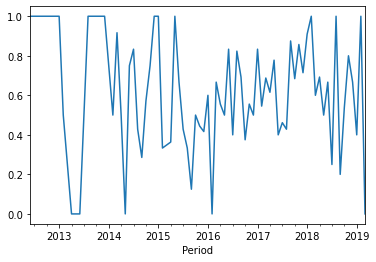

In [92]:
dataReviews_prodotto_month.plot()

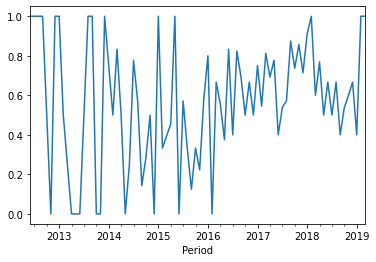

In [93]:
dataReviews_prodotto_month_rat.plot()

In [44]:
str(dataReviews_prodotto["date"])

'15374   2019-01-14\n15375   2017-12-31\n15376   2018-10-13\n15377   2018-09-22\n15378   2019-01-09\n           ...    \n20291   2018-11-09\n20329   2018-10-04\n20340   2017-11-29\n20355   2017-11-15\n20361   2018-01-12\nName: date, Length: 918, dtype: datetime64[ns]'

In [ ]:
import datetime
# considero periodi di 6 mesi
def manage_date(date):
    date= str(date)
    datee = datetime.datetime.strptime(str(date), "%Y-%m")
    six=1
    if (datee.month > 6):
        six=2
    return str(datee.year)+"-"+str(six)